# QMSS G5072 Homework 5

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re

## a) Length of Narratives
Read in the data. Find and display the longest and shortest description.

In [3]:
df = pd.read_csv('emergency.csv', names=['description'])

In [4]:
#longest description
lengths = df['description'].str.len()
argmax = np.where(lengths == lengths.max())[0]
df.iloc[argmax]

,description
109,40YOM-C/O FOOT/HEEL PAIN RUNNIJNG BACKWARDS FE...
511,19MOWF PARENTS HOLDING PT. DAD STATES SHE WA...
630,44YOF PT HAVING SEVERE R ARM PAIN THAT IS RAD...
920,57 YO F WAS POURING KEROSENE OVER AN OPEN FLAM...
1111,"13YOM DID OUTDOOR WORKOUT X1 1/2 HRS, DEVELOEP..."
...,...
9370,"20 YO M, RUNNING FROM POLICE AFTER AN ALLEGED ..."
9666,22YOM WAS LIGHTING PROPANE PIZZA OVEN ON FRI. ...
9670,45YOWM TONIGHT PT WAS TRYING TO MOVE HIS FATH...
9749,"PT.INJ.NOSE,HAND,WRIST,ELBOW WHEN RIDING BIKE ..."


In [5]:
#shortest description
argmin = np.where(lengths == lengths.min())[0]
df.iloc[argmin]

,description
7127,ABR HIP ON FLOOR
7731,INGESTION OF ***


## b) Fractures
Find all narratives related to "fractures". Try to include singular/plural/verb forms in your search. Also, FX is the medical abbreviation for fracture, so include that as well. How many fracture narratives can you find?

Fractures, Fractured, Fracturing, Fracturable all have fractur inside it, so no need to write out them.

In [6]:
fracture_df = df[(df['description'].str.contains('FRACTUR'))| (df['description'].str.contains('FX'))]

In [7]:
fracture_df.shape[0]

1499

## c) Body Parts
Among the fracture narratives, try to identify the body parts that are fractured (Note: Don't go overboard. A selection of parts is sufficient.). Make a histogram of fractured body parts (but make sure plural and singular forms are combined.)

In [8]:
dic = {}
body_dic = {}
lst = []
#Get the words before and after fracture
for i in fracture_df['description']:
    lst.append(re.search(r'(?:\S+\s)?\S*(FRACTUR|FX)\S*(?:\s\S+)?', i).group())
for i in lst:
    for j in i.split():
        if (j or j[:-1] or j[:-2]) in dic.keys():
            dic[j] += 1
        else:
            dic[j] = 1
#Pick the body parts that appears more than 10 times
for i in dic.keys():
    if (i != 'FRACTURED') and (i != 'FRACTURE') and (i != 'FX') and (i != 'FRACTURING') and (i != 'FXS'):
        if dic.get(i) > 10:
            body_dic[i] = dic.get(i)

In [9]:
#Drop the keys that are not body parts
print(body_dic.keys())
del body_dic['DX:']
del body_dic['DX']
del body_dic['DISTAL']
del body_dic['FX.']
del body_dic['FELL']
del body_dic['COMPRESSION']
del body_dic['CLOSED']
del body_dic['OF']
del body_dic['R']
del body_dic['WITH']
del body_dic['TO']
del body_dic['FX,']
del body_dic['AND']
del body_dic['L']
del body_dic['YOM']
del body_dic['RT']
del body_dic['FRACTURE.']
del body_dic['>>FX']
del body_dic['DX.']
del body_dic['LT']
del body_dic['A']
del body_dic['LOWER']
del body_dic['RIGHT']
del body_dic['FLOOR']
del body_dic['LEFT']

dict_keys(['SKULL', 'FINGER', 'DX:', 'RADIUS', 'ANKLE', 'DX', 'DISTAL', 'FX.', 'FIBULA', 'FELL', 'FOREARM', 'COMPRESSION', 'CLOSED', 'OF', 'ELBOW', 'R', 'BONE', 'WITH', 'TO', 'SHOULDER', 'FX,', 'HIP', 'CLAVICLE', 'RIB', 'FEMUR', 'AND', 'L', 'ARM', 'WRIST', 'YOM', 'TIBIA', 'HUMERUS', 'TOE', 'RT', 'FOOT', 'ULNA', 'FRACTURE.', '>>FX', 'DX.', 'LT', 'A', 'HAND', 'LOWER', 'RIGHT', 'FLOOR', 'LEFT', 'LEG', 'NASAL', 'THUMB'])


Text(0.5, 0, 'Body Parts')

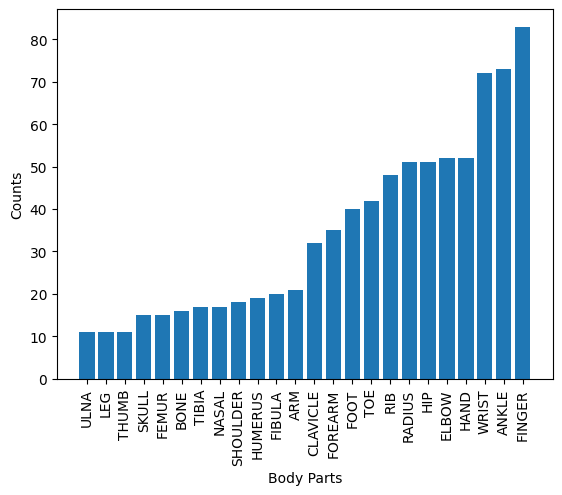

In [24]:
sorted_body_dic = dict(sorted(body_dic.items(), key=lambda item: item[1]))
plt.bar(sorted_body_dic.keys(), sorted_body_dic.values())
plt.xticks(rotation='vertical')
plt.ylabel('Counts')
plt.xlabel('Body Parts')

In [25]:
fracture_df[fracture_df['description'].str.contains('LEG')]

,description
258,38 YO F STRUCK LEG AGAINST MAILBOX FX TIBIA
504,PT SLIPPED OFF PORCH AND LANDED ON LT LEG DX: ...
511,19MOWF PARENTS HOLDING PT. DAD STATES SHE WA...
581,8 MONTH M FX HIS LOWER LEG WHEN HE FELL OUT OF...
589,12 YR M FELL WHEN ROLLERSKATING;DX FRACTURED L...
...,...
9338,19YOF FELL TWISTED LEG PLAYING SOCCER DX: LOWE...
9660,6 YO M FX UPPER LEG WHEN FLOORING MATERIAL FEL...
9805,3YOF LEG PAIN AFTER JUMPING ON A TRAMPOLINE WI...
9877,51YOM FRACTURED RADIUS ABRASION TO LEG FELL OF...


## d) Age and Gender
Let's try to extract age and gender. In a number of narratives you may have noticed a pattern:

"75 YOM, FELL DOWN STAIRS, FRACTURE LEG": A 75 year old male. \
"21MOF FINGER SHUT IN WINDOW AT HOME;NAILBED INJURY: A 21 month-old female child. \
"DX:AVULSION OF SKIN-50YOF-CUT THUMB WITH SCISSORS TONIGHT-OPENING A BOX": A 50 year old female. \
"LEFT ELBOW CONTUSION,RT SHIN LAC.PT WAS ICE SKATING AND FELL.": No information about age or gender. \
You are generally looking for a pattern with a number (age), something to indicate the units, e.g. YO or YR for years old, or MO for months old, and a character that identifies the gender. So, I suggest to think of a pattern that combines these three parts.

Create variables for age and gender (make sure to convert months to years when necessary). How many men and women are in the data? Provide a graphical representation of the number of injuries (y-axis) vs age / age group (x-axis) disaggregated by gender.

In [26]:
age_sex_list = [re.search(r'(\d+)\s*(YO|YR|MO)\s*(M|F)', i).group() for i in df['description'] \
                if re.search(r'\d+\s*(YO|YR|MO)\s*(M|F)', i) != None]
age_list = [re.search(r'(\d+)\s*(YO|YR|MO)\s*(M|F)', i).group(1) for i in df['description'] \
                if re.search(r'\d+\s*(YO|YR|MO)\s*(M|F)', i) != None]
ym_list = [re.search(r'(\d+)\s*(YO|YR|MO)\s*(M|F)', i).group(2) for i in df['description'] \
                if re.search(r'\d+\s*(YO|YR|MO)\s*(M|F)', i) != None]
sex_list = [re.search(r'(\d+)\s*(YO|YR|MO)\s*(M|F)', i).group(3) for i in df['description'] \
                if re.search(r'\d+\s*(YO|YR|MO)\s*(M|F)', i) != None]

In [27]:
#Generate female and male age list
female_age_list = []
male_age_list = []
for i in range(len(ym_list)):
    if sex_list[i] == 'F':
        if ym_list[i] == 'MO':
            female_age_list.append(int(age_list[i]) / 12)
        else:
            female_age_list.append(int(age_list[i]))
    elif sex_list[i] == 'M':
        if ym_list[i] == 'MO':
            male_age_list.append(int(age_list[i]) / 12)
        else:
            male_age_list.append(int(age_list[i]))

In [28]:
print('There are ' +str(len(female_age_list)) + ' female in the data.')
print('There are ' +str(len(male_age_list)) + ' male in the data.')

There are 3198 female in the data.
There are 4145 male in the data.


<AxesSubplot:xlabel='Sex'>

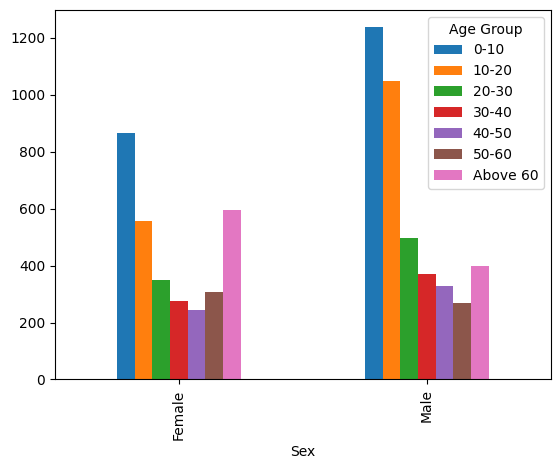

In [29]:
#Graphical representation of the number of injuries (y-axis) vs age / age group (x-axis) disaggregated by gender.
female_df = pd.DataFrame(female_age_list, columns = ['Age'])
female_df['Sex'] = 'Female'
f_age_group = []
#Add female age chunk to dataframe
for i in female_df['Age']:
    if i <= 10:
        f_age_group.append('0-10')
    elif i <= 20:
        f_age_group.append('10-20')
    elif i <= 30:
        f_age_group.append('20-30')
    elif i <= 40:
        f_age_group.append('30-40')
    elif i <= 50:
        f_age_group.append('40-50')
    elif i <= 60:
        f_age_group.append('50-60')
    else:
        f_age_group.append('Above 60')
female_df['Age Group'] = f_age_group

male_df = pd.DataFrame(male_age_list, columns = ['Age'])
male_df['Sex'] = 'Male'
m_age_group = []
#Add male age chunk to dataframe
for i in male_df['Age']:
    if i <= 10:
        m_age_group.append('0-10')
    elif i <= 20:
        m_age_group.append('10-20')
    elif i <= 30:
        m_age_group.append('20-30')
    elif i <= 40:
        m_age_group.append('30-40')
    elif i <= 50:
        m_age_group.append('40-50')
    elif i <= 60:
        m_age_group.append('50-60')
    else:
        m_age_group.append('Above 60')
male_df['Age Group'] = m_age_group
all_sex_df = pd.concat([female_df, male_df], ignore_index = True)
CrosstabResult=pd.crosstab(index=all_sex_df['Sex'],columns=all_sex_df['Age Group'])
CrosstabResult.plot.bar()

## Optional (Bonus): Regex Crossword

## Let's have a bit of fun with some regex crossword puzzle.

(A) Here is a Regex crossword. The clues in the rows and columns provide you with a way to fill the 9 boxes with individual letters.

1 is D \
2 is O \
3 is N \
4 is T \
5 is P \
6 is A \
7 is N \
8 is I \
9 is C
    